In [50]:
import pandas as pd

file_2016_path = '/Users/kyleguanzon/Downloads/2016_Polling_Places_Count_by_County/GroupBySummary_1.csv'
file_2020_path = '/Users/kyleguanzon/Downloads/Summarize_2020_Nov_03_Election___Election_Day_Polling_Placesfinal/GroupBySummary_1.csv'

data_2016 = pd.read_csv(file_2016_path)
data_2020 = pd.read_csv(file_2020_path)


In [51]:
# duplicates
data_2016 = data_2016.drop_duplicates(subset=['county_name', 'Count of Points'])
data_2020 = data_2020.drop_duplicates(subset=['county_name', 'Count of Points'])

# standardize
data_2016.rename(columns={"county_name": "NAME", "Count of Points": "Count_2016"}, inplace=True)
data_2020.rename(columns={"county_name": "NAME", "Count of Points": "Count_2020"}, inplace=True)


merged_data = pd.merge(data_2016, data_2020, on="NAME", how="outer")

# missing values
merged_data['Count_2016'] = merged_data['Count_2016'].fillna(0).astype(int)
merged_data['Count_2020'] = merged_data['Count_2020'].fillna(0).astype(int)

# net change
merged_data['Net_Change'] = merged_data['Count_2020'] - merged_data['Count_2016']

# if duplicates found, grp by county name and sum values
final_data = merged_data.groupby('NAME', as_index=False).agg({
    'Count_2016': 'sum',
    'Count_2020': 'sum',
    'Net_Change': 'sum'
})

# sort by net change
final_data = final_data.sort_values(by='Net_Change', ascending=False)

print(final_data)



          NAME  Count_2016  Count_2020  Net_Change
91        WAKE         202         412         210
28    DAVIDSON          43          86          43
73        PITT          40          80          40
0     ALAMANCE          37          76          39
50    JOHNSTON          35          72          37
..         ...         ...         ...         ...
92      WARREN          28          13         -15
8       BLADEN          34          17         -17
70      PENDER          40          19         -21
17     CATAWBA          80          40         -40
25  CUMBERLAND         154          75         -79

[100 rows x 4 columns]


In [52]:
# sort by county name
final_data = final_data.sort_values(by='NAME', ascending=True)
print(final_data)

final_data.to_csv("/Users/kyleguanzon/Downloads/Polling_Places_Alphabetized.csv", index=False)

         NAME  Count_2016  Count_2020  Net_Change
0    ALAMANCE          37          76          39
1   ALEXANDER          10          10           0
2   ALLEGHANY           4           4           0
3       ANSON          11           9          -2
4        ASHE          17          17           0
..        ...         ...         ...         ...
95      WAYNE          58          54          -4
96     WILKES          28          27          -1
97     WILSON          24          24           0
98     YADKIN          12          12           0
99     YANCEY          11          11           0

[100 rows x 4 columns]


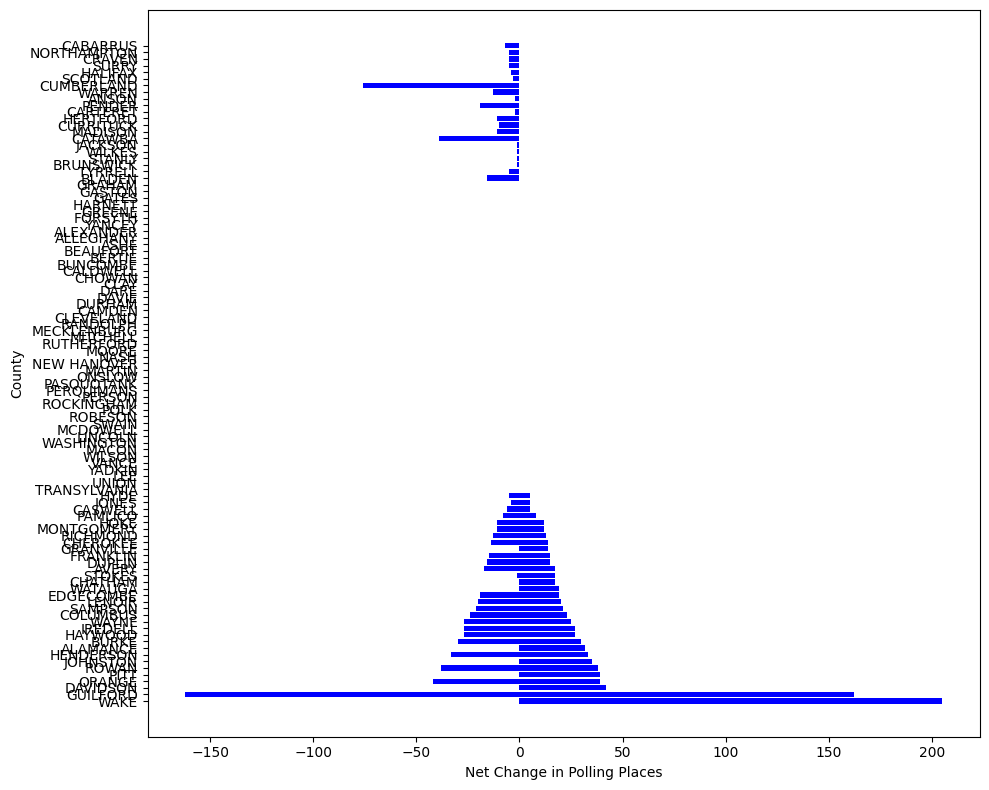

In [53]:
import matplotlib.pyplot as plt

merged_data = merged_data.sort_values(by="Net_Change", ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(merged_data['NAME'], merged_data['Net_Change'], color='blue')
plt.xlabel('Net Change in Polling Places')
plt.ylabel('County')
plt.tight_layout()
plt.show()
